In [1]:
from datetime import datetime

In [2]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 15

In [3]:
my_date = datetime(my_year, my_month, my_day)

In [4]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [5]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_min,my_sec)

In [6]:
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [7]:
my_date_time.day

2

In [8]:
import numpy as np

In [9]:
np.array(['2020-03-15','2020-03-16','2020-03-17'], dtype = 'datetime64[D]')

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [10]:
np.arange('2018-06-01','2018-07-23',7, dtype = 'datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22',
       '2018-06-29', '2018-07-06', '2018-07-13', '2018-07-20'],
      dtype='datetime64[D]')

In [11]:
import pandas as pd

In [12]:
pd.date_range('2020-01-01',periods=10, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [13]:
pd.date_range('Jan 01, 2018',periods=10, freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10'],
              dtype='datetime64[ns]', freq='D')

In [14]:
pd.to_datetime(['1/2/2018', 'Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [15]:
pd.to_datetime(['1/2/2018', '3/1/2018'], format='%d/%m/%Y')

DatetimeIndex(['2018-02-01', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [16]:
pd.to_datetime(['1--2--2018', '3--1--2018'], format='%d--%m--%Y')

DatetimeIndex(['2018-02-01', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [17]:
pd.to_datetime(['1#2#2018', '3#1#2018'], format='%d#%m#%Y')

DatetimeIndex(['2018-02-01', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [18]:
data = np.random.randn(3,2)
cols = ['A','B']
print(data)

[[-1.13254154  1.48492529]
 [ 1.58659165  0.12557822]
 [ 0.47964139  0.28469417]]


In [19]:
idx = pd.date_range('2020-01-01', periods=3, freq='D')

df = pd.DataFrame(data, columns = cols, index = idx)

In [20]:
df

,A,B
2020-01-01,-1.132542,1.484925
2020-01-02,1.586592,0.125578
2020-01-03,0.479641,0.284694


In [21]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [22]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [23]:
df.index.argmax()

2

In [24]:
df.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [25]:
df.index.argmin()

0

# Time Resampling

In [26]:
df = pd.read_csv('Data/starbucks.csv',index_col='Date',parse_dates=True)

In [27]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [28]:
# daily to yearly
df.resample(rule = 'A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [29]:
def first_day(entry):
    
    # IS THERE AN ENTRY??
    if len(entry):
        # IF SO, RETURN FIRST ENTRY
        return entry[0]

In [30]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


<AxesSubplot:xlabel='Date'>

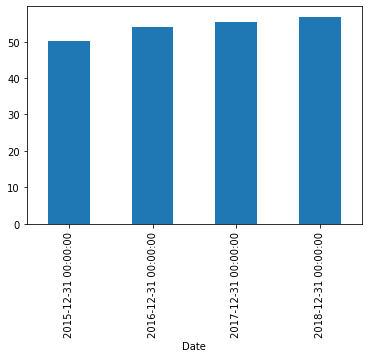

In [31]:
df['Close'].resample('A').mean().plot.bar()

# Time Shifting

In [32]:
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [33]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [34]:
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [35]:
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


In [36]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


# Rolling and Expanding

<AxesSubplot:xlabel='Date'>

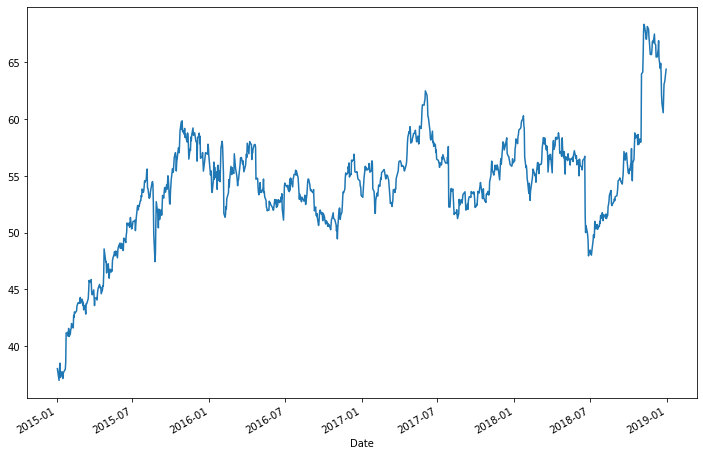

In [37]:
df['Close'].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

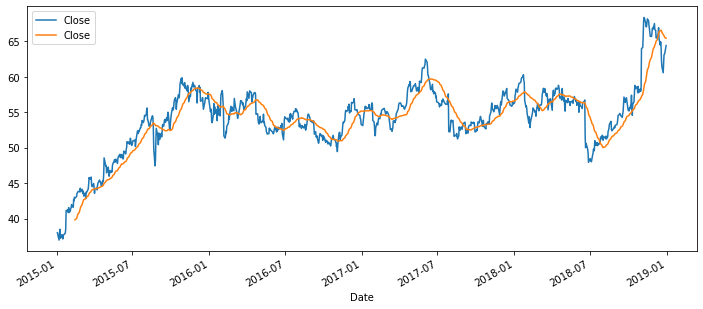

In [38]:
df['Close'].plot(figsize=(12,5), legend=True)
df.rolling(window=30).mean()['Close'].plot(legend=True)

In [39]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()

In [40]:
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


<AxesSubplot:xlabel='Date'>

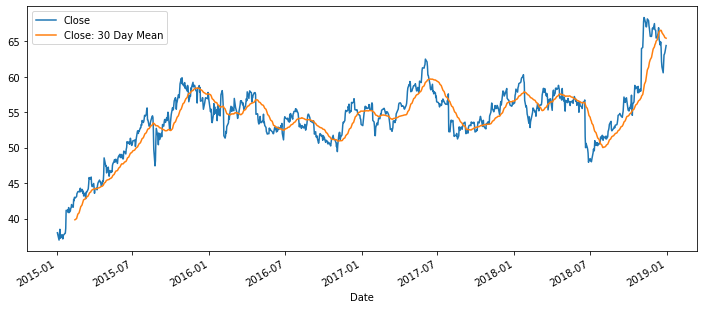

In [41]:
df[['Close', 'Close: 30 Day Mean']].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

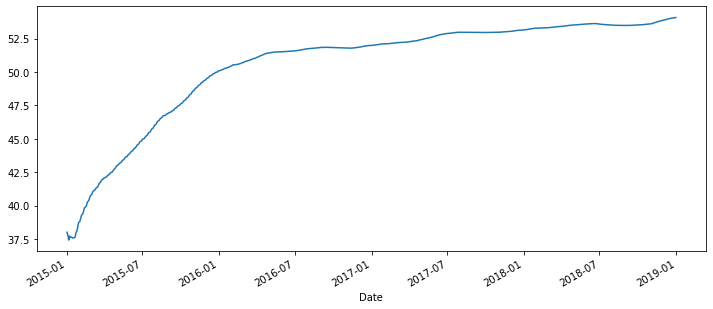

In [42]:
df['Close'].expanding().mean().plot(figsize=(12,5))

# Visualizing Time Series Data with Pandas

In [43]:
df.index = pd.to_datetime(df.index)

In [44]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [45]:
df.columns

Index(['Close', 'Volume', 'Close: 30 Day Mean'], dtype='object')

In [46]:
df.drop(['Close: 30 Day Mean'], axis=1, inplace=True)

<AxesSubplot:xlabel='Date'>

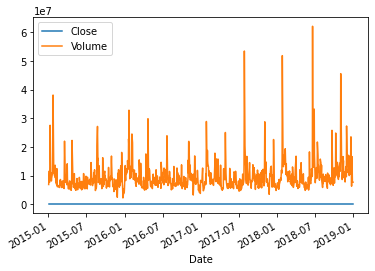

In [47]:
df.plot()

<AxesSubplot:xlabel='Date'>

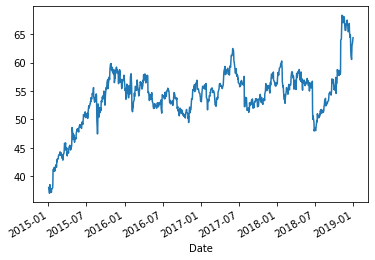

In [48]:
df['Close'].plot()

In [49]:
title = 'TITLE'
ylabel = 'Y label'
xlabel = 'X label'

[Text(0.5, 0, 'X label'), Text(0, 0.5, 'Y label')]

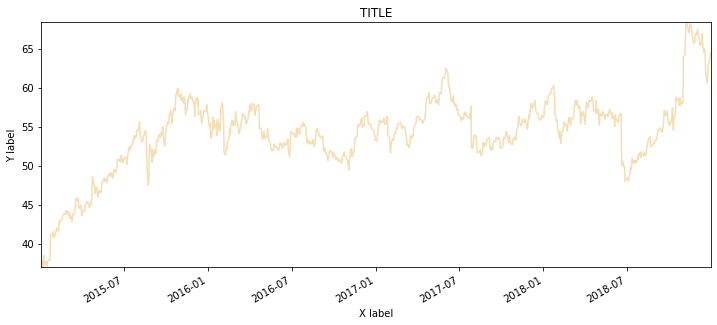

In [50]:
ax = df['Close'].plot(figsize=(12,5), title=title, color='wheat')
ax.autoscale(axis='both', tight = True)
ax.set(xlabel=xlabel, ylabel=ylabel)

<AxesSubplot:xlabel='Date'>

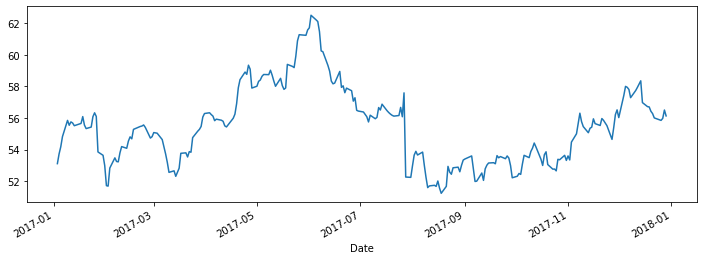

In [51]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

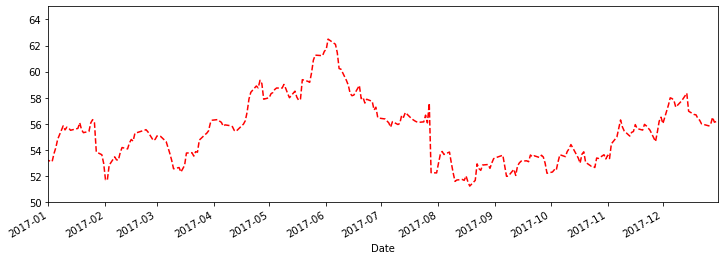

In [52]:
df['Close'].plot(figsize=(12,4), xlim=['2017-01-01','2017-12-31'], ylim=[50,65]
                , ls='--', c='red')

In [53]:
from matplotlib import dates

[Text(0.5, 0, 'xlabel')]

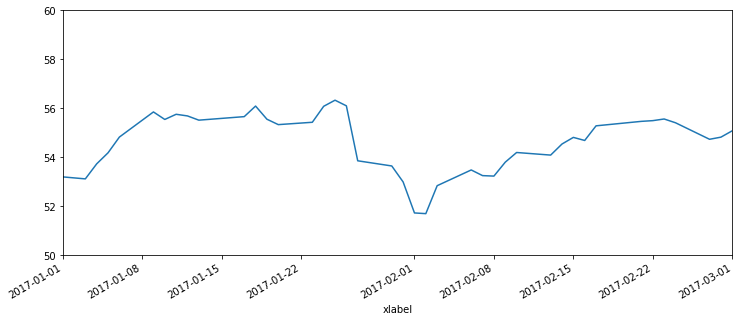

In [54]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60],figsize=(12,5))
ax.set(xlabel='xlabel')

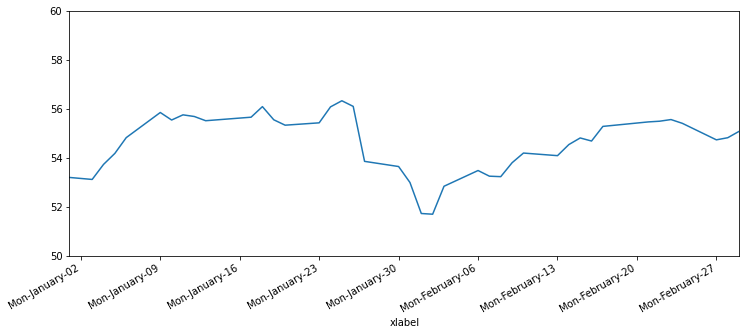

In [56]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60],figsize=(12,5))
ax.set(xlabel='xlabel')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d'))

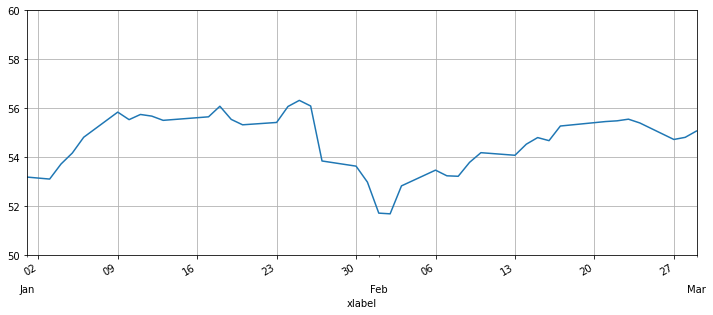

In [60]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60],figsize=(12,5))
ax.set(xlabel='xlabel')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)